In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline
from pandas import option_context

In [73]:
df = pd.read_csv("netflix_titles.csv")
background_color='#fbfbfb'
style.use('ggplot')

# 1. Basic Information

In [74]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


#### INFORMATION ABOUT THE COLUMN NAME
- show_id      : Unique ID for every Movie / Tv Show
- type         : Identifier - A Movie or TV Show
- title        : Name of the Show
- director     : Director of the movie
- cast         : Actors involved in the movie / show
- country      : Country Where the movie / show was produced
- date_added   : Date it was added on Netflix
- release_year : Actual Release year of the move / show
- rating       : TV Rating of the movie / show
- duration     : Total Duration - in minutes or number of seasons

# 2. Missing Value

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [76]:
print("The Proportion in Percentage of missing Value")
perc_missing_value = df.isnull().sum()/df.shape[0]*100
perc_missing_value[perc_missing_value!=0]

The Proportion in Percentage of missing Value


director      30.679337
cast           9.220496
country        6.510851
date_added     0.128419
rating         0.089893
dtype: float64

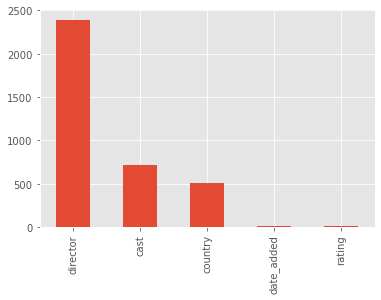

In [77]:
missing_value = df.isnull().sum()
show_missing_value = missing_value[missing_value !=0]

show_missing_value.plot(kind="bar")
plt.show()

From the chart we can see that, director column have a the biggest missing value. But because it is an important data, I'll not drop the column.

# 3. Clean The Data

### 1. Drop Column

In [78]:
df.drop('show_id', axis = 1, inplace = True)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7787 non-null   object
 1   title         7787 non-null   object
 2   director      5398 non-null   object
 3   cast          7069 non-null   object
 4   country       7280 non-null   object
 5   date_added    7777 non-null   object
 6   release_year  7787 non-null   int64 
 7   rating        7780 non-null   object
 8   duration      7787 non-null   object
 9   listed_in     7787 non-null   object
 10  description   7787 non-null   object
dtypes: int64(1), object(10)
memory usage: 669.3+ KB


### 2. Fill the Missing Value

In [80]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [81]:
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

In [82]:
df[df.date_added.isna()]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
258,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
549,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
2263,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
2288,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
2555,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
3374,TV Show,Kikoriki,NaN,Igor Dmitriev,United States,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
3492,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
3946,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
5137,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6065,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


Because it only 10 rows. We will drop the date value

In [83]:
df = df[df["date_added"].notna()]

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7777 non-null   object
 1   title         7777 non-null   object
 2   director      5398 non-null   object
 3   cast          7059 non-null   object
 4   country       7777 non-null   object
 5   date_added    7777 non-null   object
 6   release_year  7777 non-null   int64 
 7   rating        7777 non-null   object
 8   duration      7777 non-null   object
 9   listed_in     7777 non-null   object
 10  description   7777 non-null   object
dtypes: int64(1), object(10)
memory usage: 729.1+ KB


#### 1. Rating Based on Age

In [85]:
rating_ages = {    
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'}

df['rating_age'] = df['rating'].replace(rating_ages)

#### 2. Create Types Column

In [86]:
df['types'] = df['type'].map({"TV Show":0,"Movie":1})

In [87]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,rating_age,types
0,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,0
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,1
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,1
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,1
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,1


In [88]:
#Graph Analyze
def graph_analyze(fld, title, display_graph=True):
    df=pd.DataFrame({"Value": fld.value_counts().index,
                 "Count":fld.value_counts().values})
    if display_graph==True:
        plt.subplots(figsize=(25,10),facecolor=background_color)
        plt.subplot(2,2,1)
        plt.pie(fld.value_counts(),labels=fld.value_counts().index,autopct=lambda x: f'{x: .2f}%');
        plt.xticks(rotation=90)

        plt.subplot(2,2,2)   
        sns.barplot(data=df, x="Value",y="Count").set_facecolor(background_color);
        plt.xticks(rotation=90);
        plt.suptitle(title);

        plt.show()
        plt.close()

# 3. Analyst The Data

#### 1. Type Film Distribution
64.14% of the Netflix product is on the format of Movie, and the other 30.86% product is on the format of TV Show.

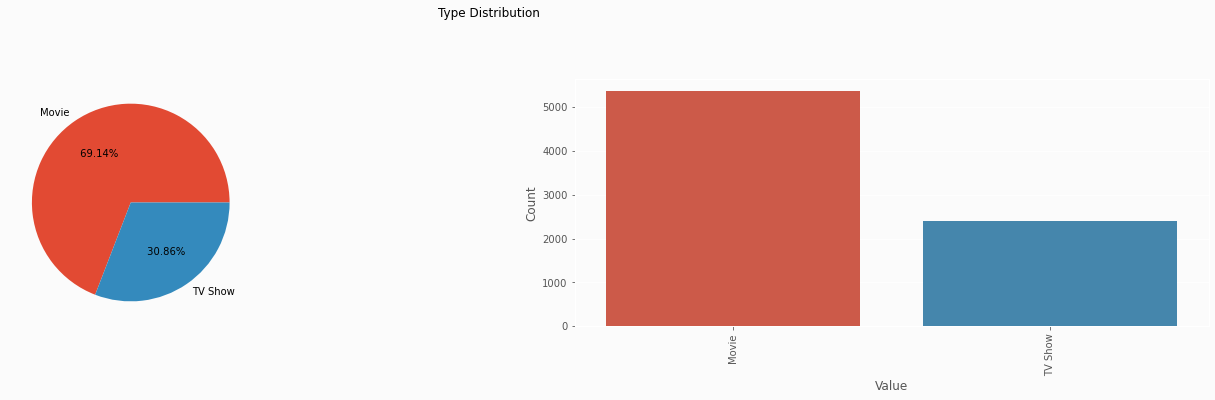

In [89]:
graph_analyze(df.type, "Type Distribution")

#### 2. Country to Produce Film
The US is the Highest place to be chosen for making a Film. This might be because the US has Hollywood which makes them have access to all film-making tool rental. Another reason is a lot of film studios use English as a language for their film. So they will choose the US as their first option to create a film.

The second place is India, which has Bollywood.

          country  count
0   United States   3055
1           India    923
2  United Kingdom    396
3           Japan    225
4     South Korea    183


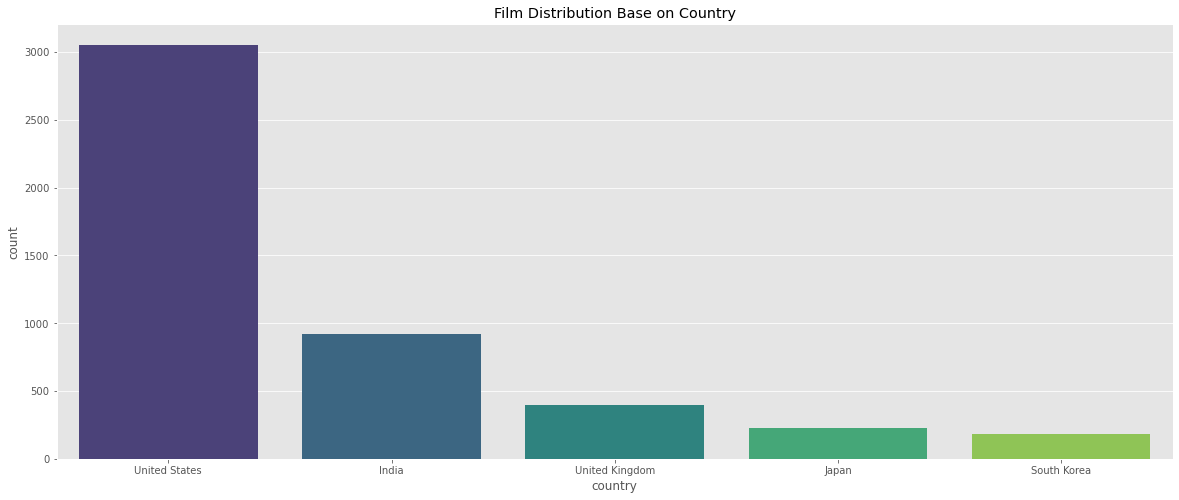

In [90]:
plt.figure(figsize=(20,8))

country = pd.DataFrame({'country' : df['country'].value_counts().index.tolist(), 'count' : df['country'].value_counts().values.tolist()})
print(country[:5])

ax = sns.barplot(data = country[:5], x = 'country', y = 'count', palette = 'viridis').set(title="Film Distribution Base on Country")

#### 3. The Director With The Most Films
Raul Campos is the most active director for netflix. A lot of his film has been publish on netflix since 2016.

                 director  count
0  Raúl Campos, Jan Suter     18
1            Marcus Raboy     16
2               Jay Karas     14
3     Cathy Garcia-Molina     13
4             Jay Chapman     12


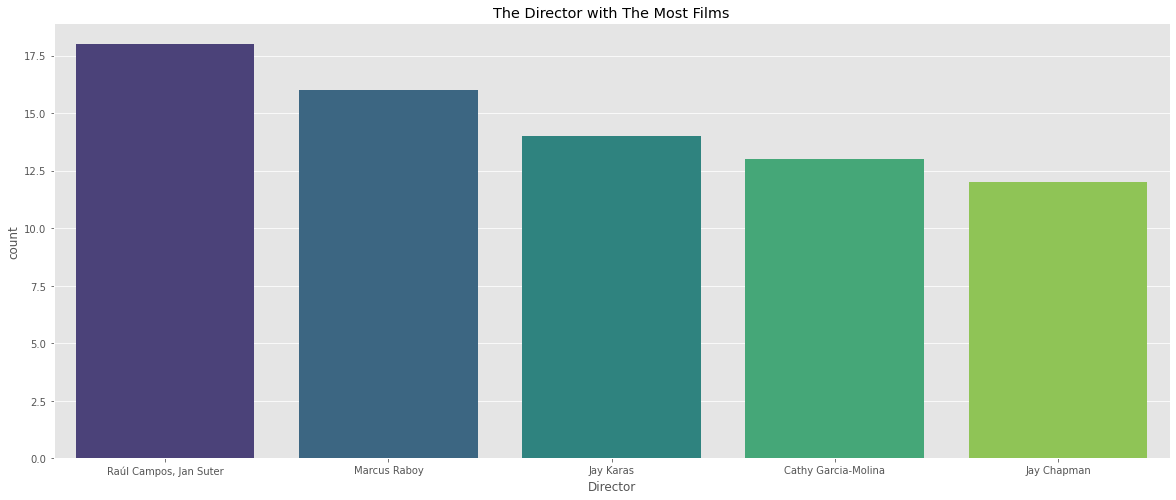

In [91]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)

director = pd.DataFrame({'director' : df['director'].value_counts().index.tolist(), 'count' : df['director'].value_counts().values.tolist()})
print(director[:5])

ax = sns.barplot(data = director[:5], x = 'director', y = 'count', palette = 'viridis').set(title="The Director with The Most Films", xlabel = "Director")

#### 4. Actor with The Most Film in Netflix
Anupam Kher is a senior actor from India. He starts his career in 1984 in the drama film Saaransh. But he receives wider recognition for his performance in Ram Lakhan. Netflix has Anupam Kher film since 1993, with the title Gumprah.

The second place is Takahiro Sakurai. He is a voice actor from Japan, who starts his career in 1996 with the tv animation series Bakusō Kyōdai Let's & Go!!. Since than he has voiced in various Japanese animated films.


In [92]:
# fig, ax = plt.subplots()
# fig.set_size_inches(30, 10)

# director = pd.DataFrame({'director' : df['director'].value_counts().index.tolist(), 'count' : df['director'].value_counts().values.tolist()})
# ax = sns.barplot(data = director[:5], x = 'director', y = 'count', palette = 'viridis')

cast_list = []
cast_count = df.cast.dropna().copy()

#Create list of Cast
for item in cast_count:
    cast_list.extend(item.split(','))
    
#remove duplicate cast
cast_list = list(set(cast_list))
print(F"number of actor {len(cast_list)}")

#Create dictionary
cast_dict = {}
for actor in cast_list :
    cast_dict[actor] = 0

for actor in cast_count :
    for x in actor.split(',') :
        cast_dict[x] += 1
cast_count = pd.Series(cast_dict)
cast_count.sort_values(ascending = False, inplace = True)

number of actor 35338


                cast  count
0        Anupam Kher     38
1   Takahiro Sakurai     28
2            Om Puri     27
3     Shah Rukh Khan     27
4        Boman Irani     25


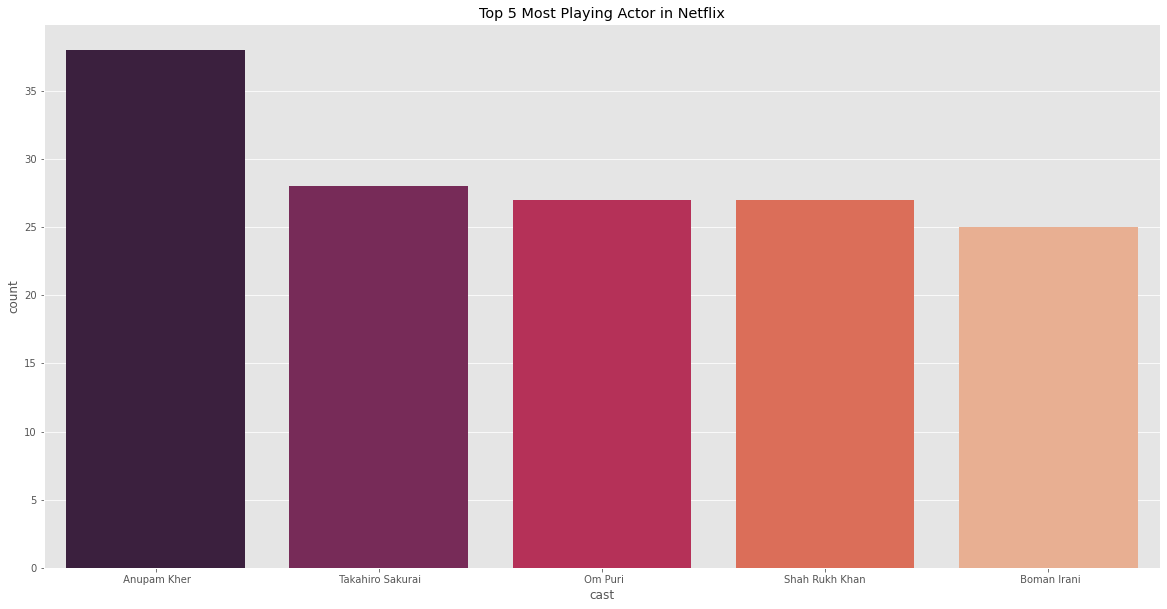

In [93]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10) 

cast_table = pd.DataFrame({'cast' : cast_count.index, 'count' : cast_count.values})
print(cast_table[:5])


ax = sns.barplot(data = cast_table[:5], x = 'cast', y = 'count', palette = 'rocket').set(title = "Top 5 Most Playing Actor in Netflix")

#### 5. Year Release
If we look at the Release Movie and TV Show Graph. We can see that before 1997 the film industry was not good enough. It doesn't even touch 100 films per year in production.
In 1997 Netflix was found as a DVD Rental Company, and after that film industry start growing.

In 2012 and after, film was growing rapidly. It because Youtube start to give its youtube channel creator an Adsense. This start to made a lot of people see an opportunity in the content creation industry. But instead of creating a youtube video, some of them choose to make a movie and TV Show.

In [94]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,rating_age,types
0,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,0
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,1
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,1
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,1
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,1


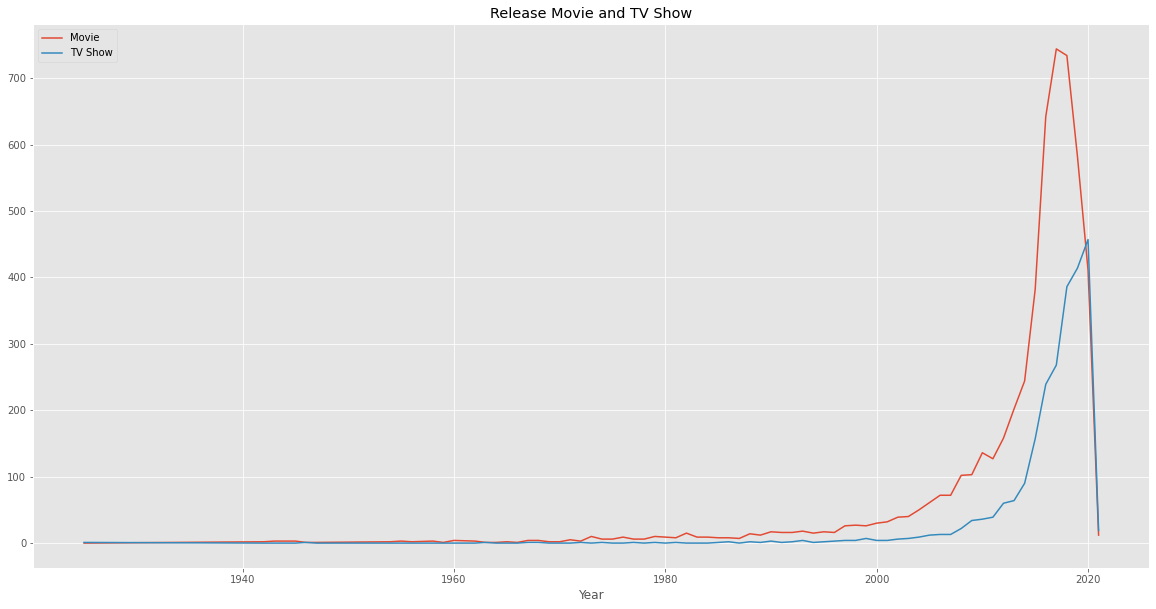

In [95]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)

count_year = df.copy()

count_year['tv_show'] = count_year['type'].map({"TV Show":1,"Movie":0})
count_year['movie'] = count_year['type'].map({"TV Show":0,"Movie":1})
count_year['total'] = count_year['type'].map({"TV Show":1,"Movie":1})


year_table = pd.DataFrame({'year' : df.groupby('release_year').type.count().index, 'movie' : count_year.groupby('release_year').movie.sum().values, 'tv_show' : count_year.groupby('release_year').tv_show.sum().values, 'total' : count_year.groupby('release_year').total.sum().values})

plt.plot(year_table.year, year_table.movie)
plt.plot(year_table.year, year_table.tv_show)
plt.legend(['Movie', 'TV Show'])
plt.title('Release Movie and TV Show')
plt.xlabel('Year')
plt.show()

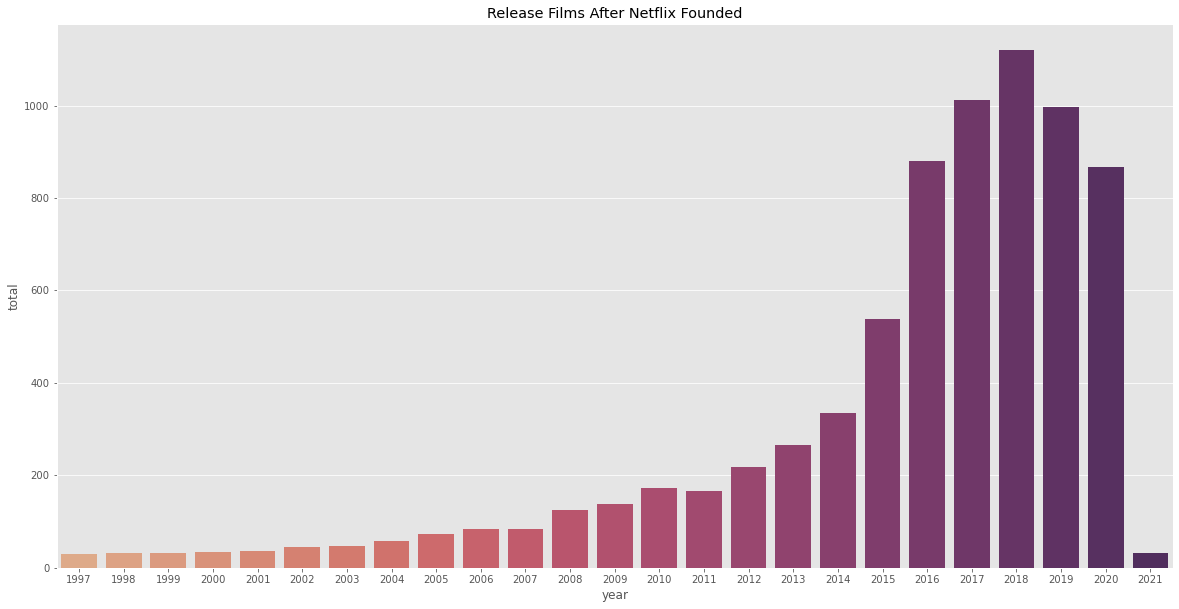

In [96]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)

after_netflix = year_table[year_table['year'] >= 1997]

ax = sns.barplot(data = after_netflix, x = 'year', y = 'total', palette = 'flare').set(title="Release Films After Netflix Founded")

#### 6. Genres
If we look at the TOP 10 Genres on Netflix, we can see that the top 5 genres on Netflix are Documentaries, stand-up comedy, and Drama. It is the same as the Top 10 Genres for Movie.
But for Top 10 Genres in TV Show, first place is Kids TV and followed by Drama in second and third place.

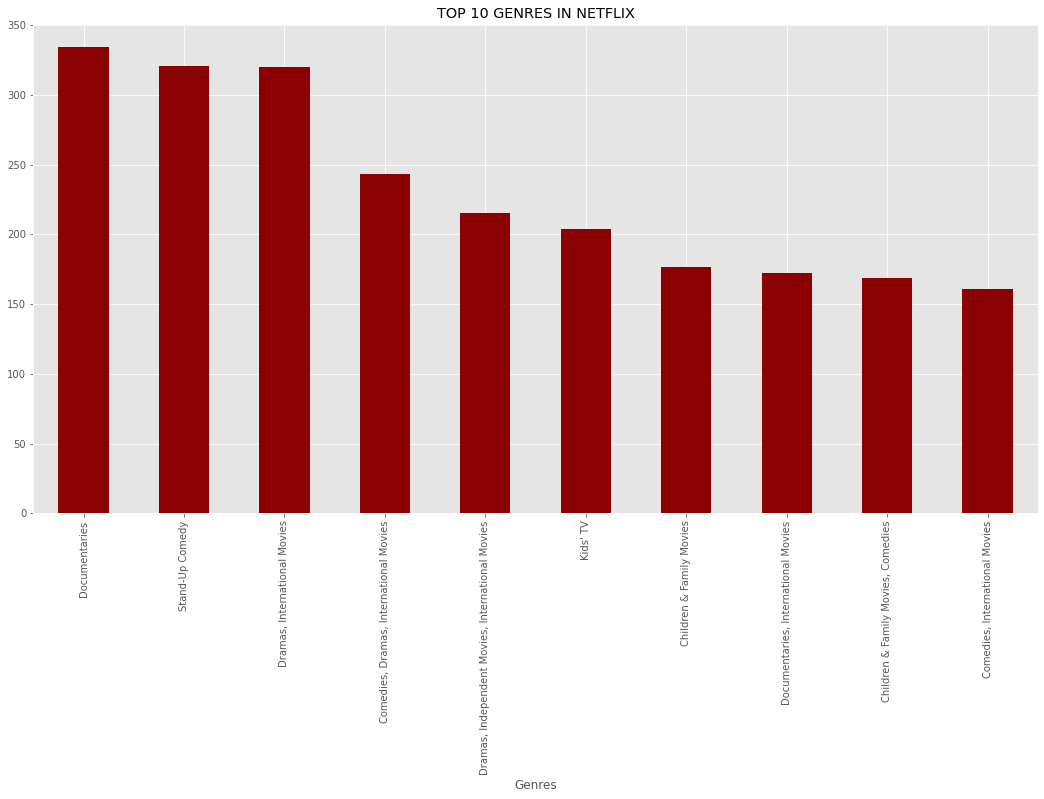

In [97]:
genre = df.copy()

fig, ax = plt.subplots()
fig.set_size_inches(18,9)

ax = genre["listed_in"].value_counts().head(10).plot(kind="bar",color="darkred").set(title="TOP 10 GENRES IN NETFLIX", xlabel = 'Genres')

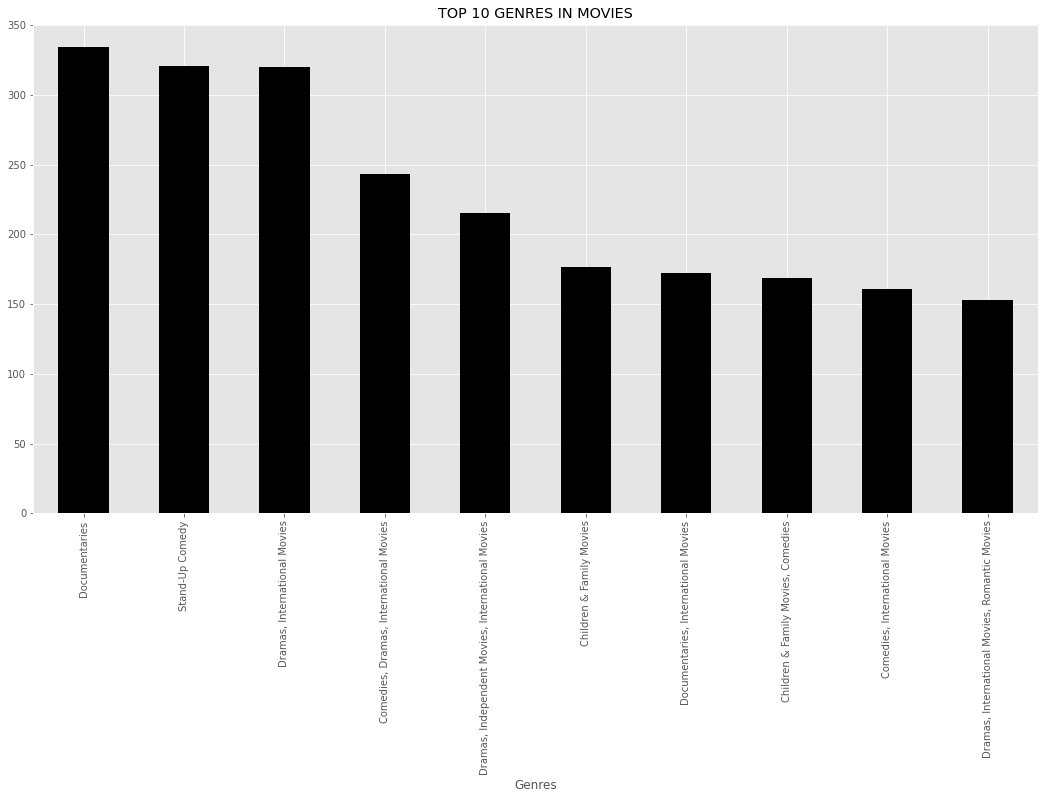

In [98]:
fig, ax = plt.subplots()
fig.set_size_inches(18,9)

ax = genre.groupby(by=genre["types"])["listed_in"].value_counts()[1].head(10).plot(kind="bar",color="black")
plt.title("TOP 10 GENRES IN MOVIES")
plt.xlabel('Genres')
plt.show()

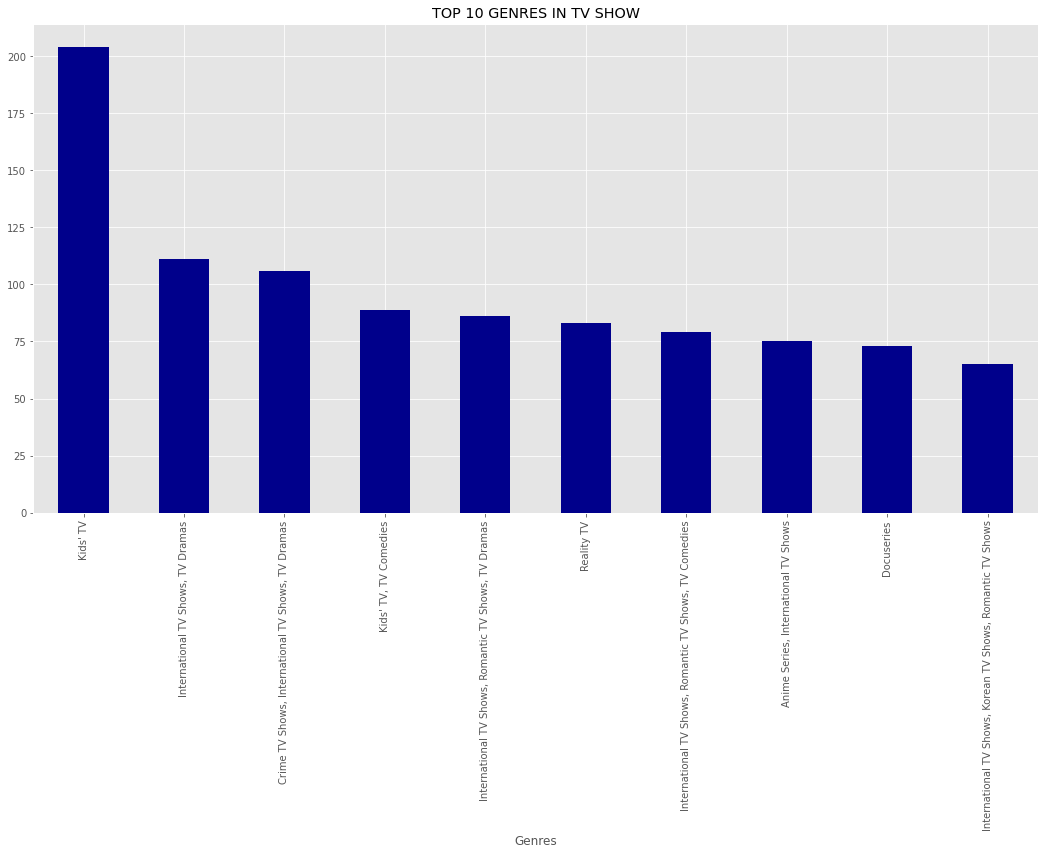

In [99]:
fig, ax = plt.subplots()
fig.set_size_inches(18,9)

ax = genre.groupby(by=genre["types"])["listed_in"].value_counts()[0].head(10).plot(kind="bar",color="darkblue")
plt.title("TOP 10 GENRES IN TV SHOW")
plt.xlabel('Genres')
plt.show()

#### 7. Rating
Base on Rating Film on Netflix Graph. We can see a lot of Netflix product is produced for Adult consumer and a little for the kids.
So this is why a lot of genres of film on Netflix are about Drama and Documenteries.

[Text(0.5, 1.0, 'Rating Film on Netflix'), Text(0.5, 0, 'Rating')]

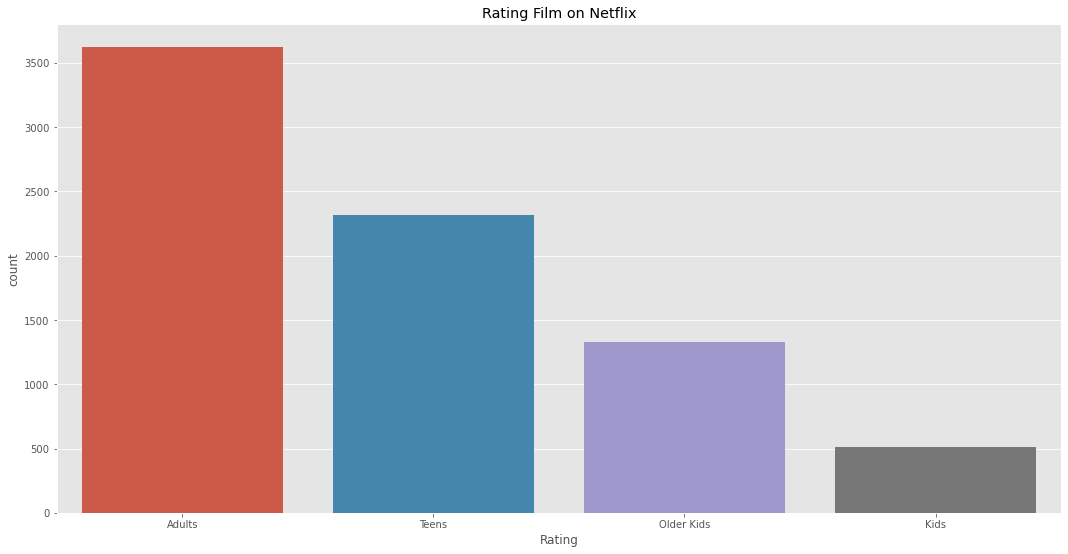

In [100]:
rating = df.copy()

fig, ax = plt.subplots()
fig.set_size_inches(18, 9)

sns.countplot(data = rating, x = "rating_age").set(title='Rating Film on Netflix', xlabel = "Rating")

#### 8. Duration
- Movie

For the Movie, the Duration is always around 90 minutes. This is because, if a film were any longer, people would either lose interest and leave or be put off and not bother to pay in the first place.
Another reason is that filmmakers use 3 acts to create their story. This 3 act is Setup, Conflict, and Resolution. We unconsciously expect a certain amount of time to be taken up with each act, and 90 minutes seems a reasonable average to aim.

- TV Show

For the TV Show, a lot of filmmakers just made the film for just 1 season.
Star is the first reason. There are some big actors, who wont to sign a contract for more than 15 episodes.
Another thing is, if the film just 1 season, the director can focus and make the movie more dramatic.

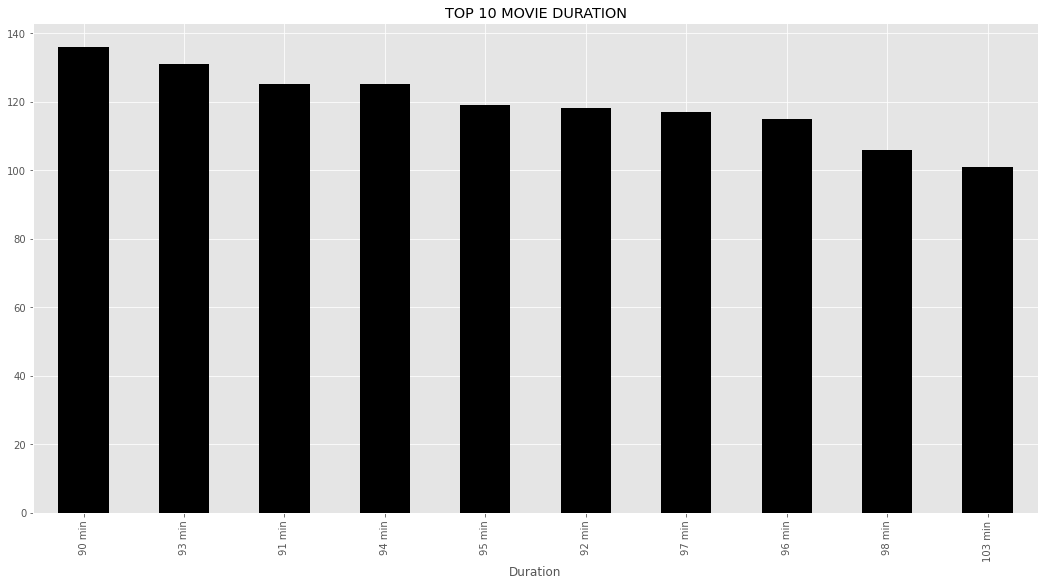

In [101]:
duration = df.copy()

fig, ax = plt.subplots()
fig.set_size_inches(18, 9)

ax = duration.groupby("types").duration.value_counts()[1].head(10).plot(kind="bar",color="black").set(title = "TOP 10 MOVIE DURATION", xlabel = "Duration")


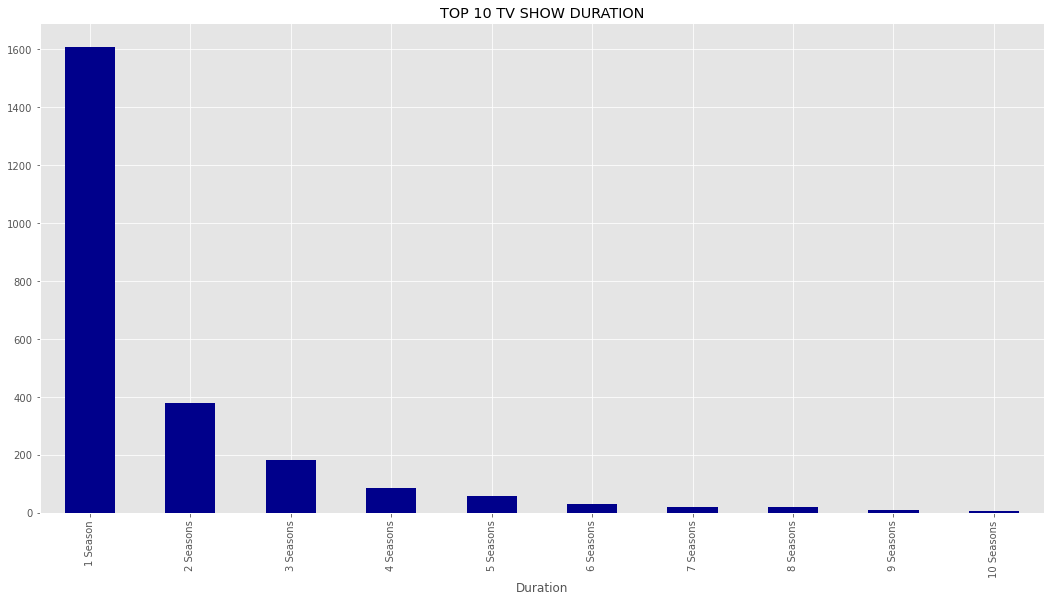

In [102]:
duration = df.copy()

fig, ax = plt.subplots()
fig.set_size_inches(18, 9)

ax = duration.groupby("types").duration.value_counts()[0].head(10).plot(kind="bar",color="darkblue").set(title = "TOP 10 TV SHOW DURATION", xlabel = "Duration")
